In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [35]:
class BaldwinOptimize:
    
    def __init__(self, fitness_function, initial_points, good_cutoff=0.5, population_size=200):
        self.fitness_function = fitness_function
        self.current_points = initial_points
        self.good_cutoff = good_cutoff
        self.generation = 0
        self.population_size = population_size
        
        self.points_track = []
        self.points_track.append(self.current_points)
        
        #TODO: Add Assertion about the dimension here
        
    def fitness(self, points=None):      
        if points == None:
            self.fitness_score = self.fitness_function(self.current_points) 
        else:
            self.fitness_score = self.fitness_function(points)
            
    def learning(self,n_steps=200,step_size=0.5):
        cut_off = self.good_cutoff
        fitness_function = self.fitness_function
        
        #TODO: make this function parallel
        def random_walk(start_point):
            #Start_point should be 1D of (1,-1) 2D numpy array
            moving_steps = np.random.normal(0, step_size, size=n_steps)
            #current_position = start_point
            for i,step in enumerate(moving_steps):
                #current_position += step
                if fitness_function(start_point+step) > cut_off:
                    break
            return (n_steps-i-1.)/n_steps
        
        self.learning_score = np.array([random_walk(point) for point in self.current_points])
    
    def competition(self, alpha=1, beta=1):
        if beta > 0:
            self.reproducibility = alpha*self.fitness_score + beta*self.learning_score + 1e-10
            self.reproducibility = self.reproducibility/np.sum(self.reproducibility)
        else:
            self.reproducibility = self.fitness_score + 1e-10
            self.reproducibility = self.reproducibility/np.sum(self.reproducibility)
    
    
    def selectivity(self):
        self.parent_points = np.random.choice(self.current_points,size=[self.population_size,2], p=self.reproducibility)
    
    def recombination(self):
        # Linear combination to get offspring points
        self.offspring_points = np.mean(self.parent_points, axis=1)
    
    def mutation(self, delta=1):
        if delta == 0:
            self.current_points = self.offspring_points
        else:
            self.current_points = self.offspring_points + np.random.normal(0,delta,size=self.offspring_points.shape)
            
               
    def evolve(self, alpha=1, beta=1, learning_nsteps=200, learning_size=0.5,mutation_strength=1):
        '''
        alpha: scale for fitness effect
        beta: scale for learning effect
        '''
        self.fitness()
        if beta > 0:
            self.learning(n_steps=200,step_size=0.5)
            self.competition(alpha=alpha, beta=beta)
        else:
            self.competition(alpha=1,beta=0)
        
        self.selectivity()
        self.recombination()
        self.mutation(delta=mutation_strength)
        self.points_track.append(self.current_points)
    
    def evaluate(self):
        self.fitness()
        self.score = np.sum(self.fitness_score>self.good_cutoff)/self.population_size

In [45]:
from IPython import display
display.set_matplotlib_formats('svg')

In [39]:
fitness_function1 = lambda x: np.exp(-x**2/0.005)
random_start_points = np.random.exponential(scale=20,size=100)+50
BO = BaldwinOptimize(fitness_function1,random_start_points)
BO1 = BaldwinOptimize(fitness_function1,random_start_points)
score = []
for i in tqdm(range(1000)):
    BO.evolve(learning_size=0.5, mutation_strength=0.5, beta=0)
    BO1.evolve(learning_size=0.5, mutation_strength=0.5, beta=19)

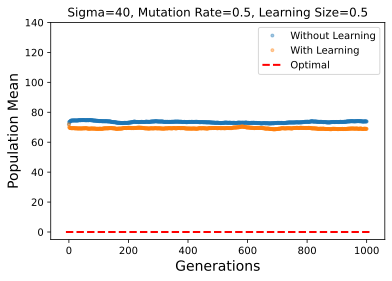

In [64]:
plt.figure(figsize=[6,4])
plt.plot([np.mean(i) for i in BO.points_track],'.',alpha=0.4, label='Without Learning')
plt.plot([np.mean(i) for i in BO1.points_track],'.',alpha=0.4,label='With Learning')
plt.hlines(0,-10,1010,colors='r',lw=2,linestyles='dashed', label="Optimal")
plt.xlabel('Generations',fontsize=14)
plt.ylabel('Population Mean',fontsize=14)
plt.ylim(-5,140)
plt.legend()
plt.title("Sigma=40, Mutation Rate=0.5, Learning Size=0.5")
plt.savefig("31.png",dpi=200,transparent=True,bbox_inches='tight')
plt.show()

In [58]:
fitness_function1 = lambda x: np.exp(-x**2/40)
random_start_points = np.random.exponential(scale=20,size=100)+50
BO_1 = BaldwinOptimize(fitness_function1,random_start_points)
BO1_1= BaldwinOptimize(fitness_function1,random_start_points)
score = []
for i in tqdm(range(1000)):
    BO_1.evolve(learning_size=0.5, mutation_strength=10, beta=0)
    BO1_1.evolve(learning_size=0.5, mutation_strength=10, beta=19)

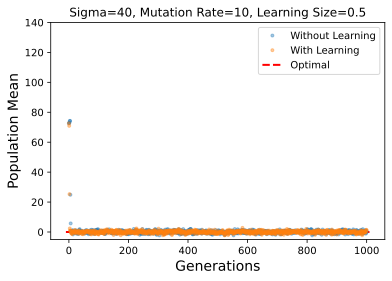

In [60]:
plt.figure(figsize=[6,4])
plt.plot([np.mean(i) for i in BO_1.points_track],'.',alpha=0.4, label='Without Learning')
plt.plot([np.mean(i) for i in BO1_1.points_track],'.',alpha=0.4,label='With Learning')
plt.hlines(0,-10,1010,colors='r',lw=2,linestyles='dashed', label="Optimal")
plt.xlabel('Generations',fontsize=14)
plt.ylabel('Population Mean',fontsize=14)
plt.ylim(-5,140)
plt.legend()
plt.title("Sigma=40, Mutation Rate=10, Learning Size=0.5")
plt.savefig("32.png",dpi=200,transparent=True,bbox_inches='tight')
plt.show()

In [68]:
fitness_function1 = lambda x: np.exp(-x**2/10000)
random_start_points = np.random.exponential(scale=20,size=100)+50
BO_2 = BaldwinOptimize(fitness_function1,random_start_points)
BO1_2= BaldwinOptimize(fitness_function1,random_start_points)
score = []
for i in tqdm(range(1000)):
    BO_2.evolve(learning_size=0.5, mutation_strength=0.5, beta=0)
    BO1_2.evolve(learning_size=0.5, mutation_strength=0.5, beta=19)

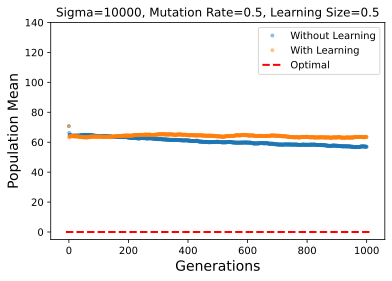

In [69]:
plt.figure(figsize=[6,4])
plt.plot([np.mean(i) for i in BO_2.points_track],'.',alpha=0.4, label='Without Learning')
plt.plot([np.mean(i) for i in BO1_2.points_track],'.',alpha=0.4,label='With Learning')
plt.hlines(0,-10,1010,colors='r',lw=2,linestyles='dashed', label="Optimal")
plt.xlabel('Generations',fontsize=14)
plt.ylabel('Population Mean',fontsize=14)
plt.ylim(-5,140)
plt.legend()
plt.title("Sigma=10000, Mutation Rate=0.5, Learning Size=0.5")
plt.savefig("33.png",dpi=200,transparent=True,bbox_inches='tight')
plt.show()

In [70]:
fitness_function1 = lambda x: np.exp(-x**2/40)
random_start_points = np.random.exponential(scale=20,size=100)+50
BO_4 = BaldwinOptimize(fitness_function1,random_start_points)
BO1_4= BaldwinOptimize(fitness_function1,random_start_points)
score = []
for i in tqdm(range(1000)):
    BO_4.evolve(learning_size=10, mutation_strength=0.5, beta=0)
    BO1_4.evolve(learning_size=10, mutation_strength=0.5, beta=19)

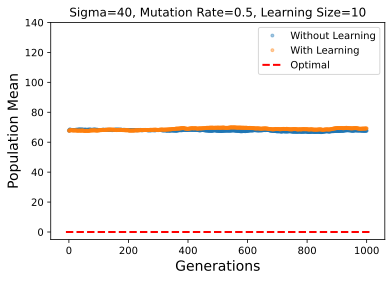

In [71]:
plt.figure(figsize=[6,4])
plt.plot([np.mean(i) for i in BO_4.points_track],'.',alpha=0.4, label='Without Learning')
plt.plot([np.mean(i) for i in BO1_4.points_track],'.',alpha=0.4,label='With Learning')
plt.hlines(0,-10,1010,colors='r',lw=2,linestyles='dashed', label="Optimal")
plt.xlabel('Generations',fontsize=14)
plt.ylabel('Population Mean',fontsize=14)
plt.ylim(-5,140)
plt.legend()
plt.title("Sigma=40, Mutation Rate=0.5, Learning Size=10")
plt.savefig("34.png",dpi=200,transparent=True,bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=[6,4])
plt.plot([np.mean(i) for i in BO_4.points_track],'.',alpha=0.4, label='Without Learning')
plt.plot([np.mean(i) for i in BO1_4.points_track],'.',alpha=0.4,label='With Learning')
plt.hlines(0,-10,1010,colors='r',lw=2,linestyles='dashed', label="Optimal")
plt.xlabel('Generations',fontsize=14)
plt.ylabel('Population Mean',fontsize=14)
plt.ylim(-5,140)
plt.legend()
plt.title("Sigma=40, Mutation Rate=0.5, Learning Size=10")
plt.savefig("34.png",dpi=200,transparent=True,bbox_inches='tight')
plt.show()

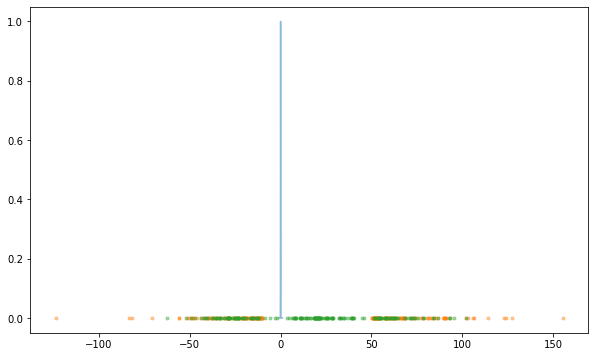

In [26]:
plt.figure(figsize=[10,6])
plt.plot(np.linspace(-1,1,1000), fitness_function1(np.linspace(-1,1,1000)), '-', alpha=0.5)
plt.plot(BO.points_track[0],fitness_function1(BO.points_track[0]),'.',alpha=0.4)
plt.plot(BO.points_track[1],fitness_function1(BO.points_track[1]),'.',alpha=0.4)
plt.show()

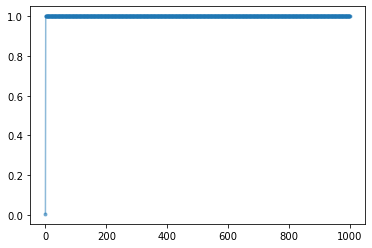

In [34]:
plt.plot(range(1000), score, '.-', alpha=0.5)
plt.show()